## Overview

   This notebook will introduce the problem that will be answered.  In addition, hypotheses will be made in order to aid in solving the problem as well as to start brewing insights on how to solve the problem.  The importance of solving the problem and how a company can use the resulting information will be looked at.  Finally, the data wrangling process will be conducted in order to clean the data set for future analysis. 
   
   
## Predicting the Likelihood of Acceptance for an H1B-LCA application
 
An H1B visa is a non-immigrant visa that allows foreign born workers to enter the United States and work temporarily for up to three years with a possibility of extension for up to 6 years.  In order for a worker to receive an H1B visa, an employer must offer them a position and then submit an H1B visa application with the Department of Immigration.  H1B visas are commonly applied to by international students are who are looking to work after completing their education in the United States.

A preliminary step before an H1B application can be filed is the submission of the LCA (Labor Condition Application) to the Department of Labor.  The LCA contains information about the job title being offered, duration of the job, whether job is full time, rate of pay, location of the job, and the prevailing wage in the area.  The purpose of the LCA is to bind the employer to agree to pay a fair wage and provide benefits to a foreign born worker that are equal to the prevailing wage and benefits at that occupation’s location.  In addition, the employer should provide the same working conditions to H1B applicants as other workers under the LCA application.  

The dataset contains one year worth of data from fiscal year 2017 and approximately 625,000 records of H1B-LCA application results.  I want to prevent employers from having their LCA application denied by identifying and communicating to the employer what the employment characteristics are for a high acceptance rate and low acceptance rate.  If the reason an application is denied is mainly due to the fields defined by the employer such as wage offered or worksite location, the employer will know what to change in their application in order to be certified.  The reason for H1B-LCA denial cannot be due to the employee because the application does not contain any information about the employee, only the employer.  In addition, I will be able to predict whether an employer’s prospective employee will have the LCA approved so that the employer can focus their time on changing characteristics about the job offered or the company so that an H1B-LCA is approved. 

My client is any company that wishes to hire a foreign born worker.  The client should care about H1B-LCA outcomes because they do not want to spend time filing and looking for candidates that will eventually not be certified with a successful H1B LCA application.  Based on my analysis, the employer will be able to find workers that are likely to be H1B-LCA certified by changing characterisitcs about the job offered to characteristics that have a high H1B-LCA certification rate.  

Initial hypotheses for a H1B-LCA application denial include the employer name, the job title, whether the job is part time or not, the difference between the prevailing wage and the wage offered by the employer, whether the employer is H1-B dependent, whether the employer is a willful violator,  and whether the employer agreed to the labor condition agreement subsection on the application.  A large difference between prevailing wage and wage offered means the employer is not giving a fair wage which could cause the application to be denied.  An employer having too many H1-B employees, being a willful violator, or not agreeing to the labor condition agreement are all signs for an application possibly recieving a denied status. 

## Data Wrangling

   The first step to examining the data involves data wrangling or the process of converting the data into a more valuable format that can be used for analysis.  The current dataset was obtained from, https://www.foreignlaborcert.doleta.gov/performancedata.cfm.  The dataset contains H1B-LCA application data from the 2017 fiscal year.  
   
   The data wrangling for this dataset can be split into and defined by these four steps: deletion of unecessary columns, deletion of rows that contain missing values, deletion of rows with incorrect characters that do not represent the field correctly, and checking for outlier values.

First, the dataset needs to be uploaded into a pandas dataframe so that data wrangling can start.  In order for pandas to read the .xslx file, the file was converted to a csv file and encoded to utf-8.  

In [4]:
import pandas as pd


df = pd.read_csv('H1B1.csv', low_memory=False)

Every column of the dataframe is shown below without hiding columns so that every column can be seen.

In [5]:
pd.set_option('display.max_columns', None)
print(df.head(2))

          CASE_NUMBER          CASE_STATUS CASE_SUBMITTED DECISION_DATE  \
0  I-200-16055-173457  CERTIFIED-WITHDRAWN      2/24/2016     10/1/2016   
1  I-200-16064-557834  CERTIFIED-WITHDRAWN       3/4/2016     10/1/2016   

  VISA_CLASS EMPLOYMENT_START_DATE EMPLOYMENT_END_DATE  \
0       H-1B             8/10/2016           8/10/2019   
1       H-1B             8/16/2016           8/16/2019   

            EMPLOYER_NAME EMPLOYER_BUSINESS_DBA     EMPLOYER_ADDRESS  \
0  DISCOVER PRODUCTS INC.                   NaN  2500 LAKE COOK ROAD   
1        DFS SERVICES LLC                   NaN  2500 LAKE COOK ROAD   

  EMPLOYER_CITY EMPLOYER_STATE EMPLOYER_POSTAL_CODE          EMPLOYER_COUNTRY  \
0    RIVERWOODS             IL                60015  UNITED STATES OF AMERICA   
1    RIVERWOODS             IL                60015  UNITED STATES OF AMERICA   

  EMPLOYER_PROVINCE EMPLOYER_PHONE EMPLOYER_PHONE_EXT  \
0               NaN     2244050900                NaN   
1               NaN     

The unecessary columns that do not help us with exploratory data analysis or answering the overall question of predicting the likelihood of an accepted application will be removed.  A justification will be provided for each field deletion so that columns with vital information are not mistakenly taken out.  

In [6]:
df.columns
df.drop(['CASE_NUMBER'], axis = 1, inplace = True) #The case number is an arbitrary string that does not affect application outcome
df.drop(['DECISION_DATE'], axis = 1, inplace = True)  #The decision date is arrived at by the U.S. Department of Labor not by the applicant 
df.drop(['EMPLOYER_BUSINESS_DBA'], axis=1, inplace=True)  #The official employer is already listed, the unofficial name is unecessary
df.drop(['EMPLOYER_PHONE'], axis=1, inplace=True) #The employer phone is not a variable that affects the application outcome
df.drop(['EMPLOYER_PHONE_EXT'], axis=1, inplace=True) #The employer phone extension is not a variable that affects the application outcome
df.drop(['AGENT_ATTORNEY_CITY'], axis=1, inplace=True) #The attorney's city is not of relevance to the LCA applicant
df.drop(['AGENT_ATTORNEY_STATE'], axis=1, inplace=True) #The attorney's state is not relevant to the LCA applicant
df.drop(['SOC_CODE'], axis=1, inplace=True) #The occupational grouping by the SOC is already listed, code is not needed.
df.drop(['ORIGINAL_CERT_DATE'], axis=1, inplace=True) #This date is a decision made by the Department of Labor not applicant
df.drop(['PUBLIC_DISCLOSURE_LOCATION'], axis=1, inplace=True) #Generic information that does not add any new information
df.drop(['PW_WAGE_LEVEL'], axis=1, inplace=True) #Wage is already listed, wage level does not provide any new information
df.drop(['PW_SOURCE_OTHER'], axis=1, inplace=True) #The source of prevailing wage is not affecting status of LCA application
df.drop(['EMPLOYER_PROVINCE'], axis=1, inplace=True) #The province is incorrectly listed or not listed in many rows and provides no new information.



There are 624,650 rows in the dataset.  A lot of these rows contain missing values.  When all rows with any missing values are deleted, only 98,155 rows remain.  Therefore, only the columns with absolutely crucial information for predicting H1B-LCA application status will have the entries for their corresponding missing values removed.  Only columns with crucial information that affect H1B-LCA application outcome will have entries for their corresponding missing values removed in order to preserve a substantial row count for later analysis.  



The code below finds all the columns that have an missing value.  

In [7]:
columns=df.columns[df.isna().any()].tolist()
columns

['EMPLOYMENT_START_DATE',
 'EMPLOYMENT_END_DATE',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_NAME',
 'NAICS_CODE',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'PW_SOURCE',
 'PW_SOURCE_YEAR',
 'WAGE_RATE_OF_PAY_TO',
 'WAGE_UNIT_OF_PAY',
 'H1B_DEPENDENT',
 'WILLFUL_VIOLATOR',
 'SUPPORT_H1B',
 'LABOR_CON_AGREE',
 'WORKSITE_CITY',
 'WORKSITE_COUNTY',
 'WORKSITE_STATE',
 'WORKSITE_POSTAL_CODE']

The columns considered to be crucial and ready to have the corresponding entries containing the null value in the column removed are the employer_name, employer_address, employer_city, job_title, soc_name, full_time_position, prevailing_wage, pw_unit_of_pay, wage_rate_of_pay_to, wage_unit_of_pay, H1B dependent, willful violator, support h1b, labor_con_agree, and worksite_city.  The columns considered to be crucial are the columns that can possibly affect the outcome of the H1B-LCA application.  These columns will have the entries containing null values of this column deleted.


In [8]:
df=df.dropna(axis=0, how='any', subset=['EMPLOYER_NAME', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'JOB_TITLE', 'SOC_NAME', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE', 'WORKSITE_CITY' ])


Now that the entries with missing values in critical fields have been removed, values that are irregularities need to be replaced with more understandable notation.  For example in the AGENT_ATTORNEY_NAME field, a comma is in many rows that do not have an attorney name.  The comma can be replaced with the value None so that it is easily identifiable if an application had an attorney or not.  

In [9]:
df['AGENT_ATTORNEY_NAME'] = df['AGENT_ATTORNEY_NAME'].map({',': 'None'})

Currently, the industry from which the job is in is represented by a NAICS_CODE.  The NAICS code needs to be converted to an industry name.  The following code cell retrieves the corresponding industry name from the formatted url and adds unique values to a dictionary.  Unique values are first replaced in the dataframe with industry names then the duplicate values are populated.  Replacing the numerical codes with industry names is more readable and easy to understand.  

In [10]:
import requests
codes={}

for index, row in df.iterrows():     #Iterate through each row in the dataframe
        code=(row['NAICS_CODE'])   #Focus on the NAICS_CODE column
        code=str(code)
        if code not in codes:  #check if code is in dictionary
            url='http://naics.codeforamerica.org/v0/q?year=2012&code=' + code
            r=requests.get(url, stream=True) #retrieve url object
            data=r.json()
            try:
                codes[code]=data['title']  #add unique value to dictionary
                df.at[index, 'NAICS_CODE'] = codes[code] #change cell value
            except:
                df.at[index, 'NAICS_CODE'] = None
       
        else:
            try:
                df.at[index, 'NAICS_CODE'] = codes[code]  #change cell value
            except:
                df.at[index, 'NAICS_CODE'] = None
         
            
       
     


Next, the case status column will be examined in order to remove irrelevant rows.  The case status column identifies whether or not the H1B-LCA application was certified, denied, withdrawn, or certified-withdraw.  Because the goal is to predict the likelihood of an applicant receiving a certified status, the rows containing applications that were withdrawn can be removed as they give no insight on whether an application was certified or not.  

In [11]:
df = df[df.CASE_STATUS != 'WITHDRAWN']



A possible reason for the declined H1B-LCA application is the difference between the prevailing wage and the wage offered by the employer.  If the wage difference is large, it may be reason for the application receiving a rejection because a lower wage than the prevailing wage is considered unfair.  The units for the prevailing wage and the offered wage may be in different units such as monthly, hourly, and yearly.  The following script converts the units and the monetary value of the prevailing wage to the units and monetary value of the wage offered by the employer.  

In [12]:
tru=[]
for index, row in df.iterrows():
    if row['PW_UNIT_OF_PAY'] == row['WAGE_UNIT_OF_PAY']:
        pass
    else:
        row['PREVAILING_WAGE']=row['PREVAILING_WAGE'].replace(',','')
        row['WAGE_RATE_OF_PAY_FROM']=row['WAGE_RATE_OF_PAY_FROM'].replace(',','')
        if (row['PW_UNIT_OF_PAY']=='Hour') & (row['WAGE_UNIT_OF_PAY']=='Year'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*2080 #Convert Hour to Year
        if (row['PW_UNIT_OF_PAY']=='Year') & (row['WAGE_UNIT_OF_PAY']=='Hour'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Hour'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])/2080 #Convert Year to Hour
        if (row['PW_UNIT_OF_PAY']=='Year') & (row['WAGE_UNIT_OF_PAY']=='Month'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Month'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])/12  #Convert Year to Month
        if (row['PW_UNIT_OF_PAY']=='Month') & (row['WAGE_UNIT_OF_PAY']=='Year'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*12  #Convert Month to Year
        if (row['PW_UNIT_OF_PAY']=='Week') & (row['WAGE_UNIT_OF_PAY']=='Year'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*52  #Convert Week to Year
        if (row['PW_UNIT_OF_PAY']=='Year') & (row['WAGE_UNIT_OF_PAY']=='Week'):
            df.at[index, 'PW_UNIT_OF_PAY'] = 'Week'
            df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])/52  #Convert Year to Week
        
        
            
        
        


In order to see if there is a discrepancy between the prevailing wage and wage given by the employer, a calculated field is created below that represents the difference between the prevailing wage and wage given by the employer.  

In [13]:
for index, row in df.iterrows():
    df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = str(row['WAGE_RATE_OF_PAY_FROM']).replace(',','')
    df.at[index, 'PREVAILING_WAGE']=str(row['PREVAILING_WAGE']).replace(',','')
df['WAGE_DIFFERENCE'] = df.WAGE_RATE_OF_PAY_FROM.astype(float)-df.PREVAILING_WAGE.astype(float)

In the WAGE_RATE_OF_PAY_TO field, many cells have the value 0.00.  This field represents the max wage offered by the employer.  0.00 should be replaced with None as this is a more appropriate representation of the wage offered by the employer.  

In [14]:
for index, row in df.iterrows():
    if row['WAGE_RATE_OF_PAY_TO']=='0.00':
        df.at[index, 'WAGE_RATE_OF_PAY_TO'] = None


Another aspect of data wrangling involves finding the outliers in a field that may lead to faulty analysis later on.  In order to make sure the prevailing wage column and the wage rate offered by the employer contain values that are valid, a scatter plot can be constructed to make sure the salaries fall within a reasonable range.  

The lists for graphing wage offered vs. prevailing wage by different units of time are created in the code below.  

In [15]:

import matplotlib.pyplot as plt
pw_year=[]
wage_year=[]
pw_month=[]
wage_month=[]
pw_week=[]
wage_week=[]
pw_hour=[]
wage_hour=[]
for index, row in df.iterrows():
    if (row['PW_UNIT_OF_PAY']=='Year') & (row['WAGE_UNIT_OF_PAY']=='Year'):   #Wage w/ units Year
        pw_year.append(row['PREVAILING_WAGE'])
        wage_year.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Month') & (row['WAGE_UNIT_OF_PAY']=='Month'): #Wage w/ units Month
        pw_month.append(row['PREVAILING_WAGE'])
        wage_month.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Week') & (row['WAGE_UNIT_OF_PAY']=='Week'):  #Wage w/ units Week
        pw_week.append(row['PREVAILING_WAGE'])
        wage_week.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Hour') & (row['WAGE_UNIT_OF_PAY']=='Hour'):  #Week w/ units Hour
        pw_hour.append(row['PREVAILING_WAGE'])
        wage_hour.append(row['WAGE_RATE_OF_PAY_FROM'])
    
    
    

    




Install plotly graphical visualization tool

In [18]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (3.1.1)
Requirement not upgraded as not directly required: six in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (1.11.0)
Requirement not upgraded as not directly required: requests in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (2.18.4)
Requirement not upgraded as not directly required: nbformat>=4.2 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (4.4.0)
Requirement not upgraded as not directly required: pytz in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (2018.4)
Requirement not upgraded as not directly required: decorator>=4.0.6 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (4.3.0)
Requirement not upgraded as not directly required: retrying>=1.3.3 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (1.3.3)
Requirement not upgr

The following code creates a scatter plot showing the relationship between the wage offered by the employer to the prevailing wage for the position.  Any wages that seem unreasonable will have the rows they are contained in removed.  

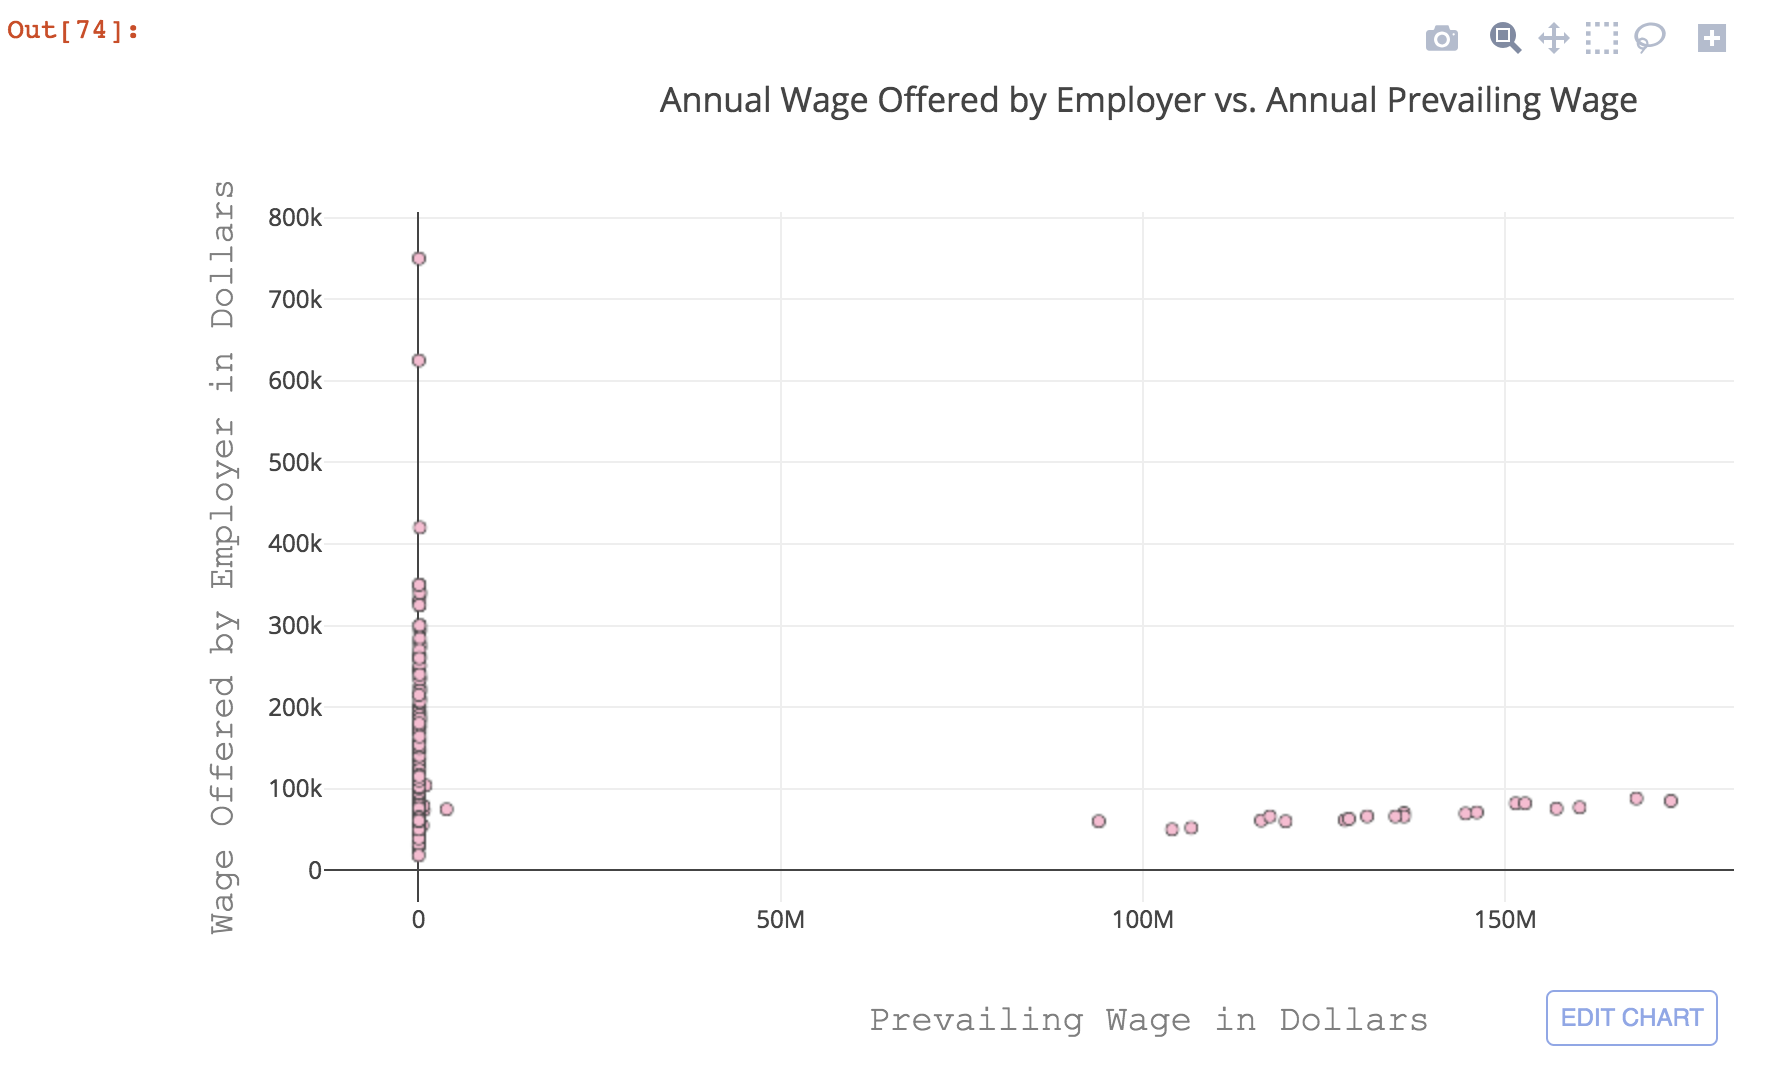

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from key import key
import plotly
from IPython.display import Image
from IPython.display import display

plotly.tools.set_credentials_file(username='spaturi', api_key=key)

trace = go.Scattergl(
    x = np.array(pw_year),    #Graph the prevailing wage with units year
    y = np.array(wage_year),  #Graph the wage offered with units year
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='Annual Wage Offered by Employer vs. Annual Prevailing Wage',
    xaxis=dict(
        title='Prevailing Wage in Dollars',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Wage Offered by Employer in Dollars',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig)
x = Image(filename='Prevailing_Wage_Graph.png')  
display(x)

It is clear from the graph above that there are outlier values in the prevailing wage axis.  There are some entries with a prevailing wage greater than 50 million.  These are not correct prevailing wages and should be removed from the dataset.  However, when looking at the case status of these applications with a prevailing wage greater than 50 million below, it is seen that all the application are denied.  It can be hypothesized that an unrealistic prevailing wage listed can lead to an application denial.  Removing these rows would remove rows that recieved a denial status and make the dataset even more unbalanced towards the certified entries.  Therefore, the outliers are kept because prevailing wage may be a large factor in the application case status.


In [23]:
for index, row in df.iterrows():
    if row['PW_UNIT_OF_PAY']=='Year':
        if float(row['PREVAILING_WAGE'])>50000000:
            print(row['PREVAILING_WAGE'], row['JOB_TITLE'], row['CASE_STATUS'])
    


144501760.0 PROGRAMMER ANALYST / SOFTWARE DEVELOPER DENIED
146059680.0 SOFTWARE ENGINEER/DEVELOPER DENIED
160249440.0 TECHNICAL WRITER DENIED
157048320.0 DATABASE ADMINISTRATOR DENIED
172839680.0 PROGRAMMER ANALYST DENIED
134811040.0 PROGRAMMER ANALYST DENIED
93882880.0 COMPUTER PROGRAMMER DENIED
201622735.00 CONSULTANT LEVEL 3 DENIED
106645760.0 NETWORK ENGINEER DENIED
104000000.0 PROGRAMMER ANALYST DENIED
116292800.0 PROGRAMMER ANALYST DENIED
119668640.0 SYSTEMS ANALYST DENIED
128406720.0 NETWORK ENGINEER DENIED
152721920.0 NETWORK ENGINEER DENIED
127845120.0 LEAD ENGINEER DENIED
168080640.0 COMPUTER PROGRAMMER ANALYST DENIED
130917280.0 SYSTEMS ANALYST DENIED
151424000.0 PROGRAMMER ANALYST DENIED
136021600.0 SOFTWARE QA DENIED
136021600.0 SOFTWARE QA DENIED
117505440.0 MECHANICAL ENGINEER DENIED


The following code cell displays the final dataframe after the data wrangling steps have concluded.  

In [24]:
df

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,JOB_TITLE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_DIFFERENCE
6,CERTIFIED-WITHDRAWN,2/25/2016,H-1B,8/25/2016,8/24/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,BUSINESS SYSTEMS ANALYST,MANAGEMENT ANALYSTS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,52915.00,Year,Other,2015.0,61000.00,None,Year,Y,N,Y,Y,EDISON,MIDDLESEX,NJ,08837,8085.00
7,CERTIFIED-WITHDRAWN,2/25/2016,H-1B,8/26/2016,8/25/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,PROGRAMMER ANALYST,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,51730.00,Year,Other,2015.0,60500.00,None,Year,Y,N,Y,Y,EDISON,MIDDLESEX,NJ,08837,8770.00
8,CERTIFIED-WITHDRAWN,2/27/2016,H-1B,8/26/2016,8/25/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,PROGRAMMER ANALYST,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,58053.00,Year,Other,2015.0,60450.00,None,Year,Y,N,Y,Y,NEW YORK,NEW YORK,NY,10005,2397.00
9,CERTIFIED-WITHDRAWN,2/28/2016,H-1B,8/29/2016,8/26/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,MARKET RESEARCH ANALYST,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,46821.00,Year,Other,2015.0,50000.00,None,Year,Y,N,Y,Y,ISELIN,MIDDLESEX,NJ,08830,3179.00
10,CERTIFIED-WITHDRAWN,2/29/2016,H-1B,8/29/2016,8/29/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,PROGRAMMER ANALYST,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,58053.00,Year,Other,2015.0,60400.00,None,Year,Y,N,Y,Y,NEW YORK,NEW YORK,NY,10010,2347.00
11,CERTIFIED-WITHDRAWN,3/23/2016,H-1B,9/22/2016,9/20/2019,ADVANCED TECHNOLOGY GROUP USA INC,666 PLAINSBORO RD,PLAINSBORO,NJ,08536,UNITED STATES OF AMERICA,N,None,BUSINESS ANALYST,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,63170.00,Year,Other,2015.0,63200.00,None,Year,Y,N,Y,Y,PRINCETON,MERCER,NJ,08540,30.00
12,CERTIFIED-WITHDRAWN,3/23/2016,H-1B,9/22/2016,9/20/2019,ADVANCED TECHNOLOGY GROUP USA INC,666 PLAINSBORO RD,PLAINSBORO,NJ,08536,UNITED STATES OF AMERICA,N,None,SAP BASIS ADMINISTRATOR,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,51730.00,Year,Other,2015.0,60100.00,None,Year,Y,N,Y,Y,NEW BRUNSWICK,MIDDLESEX,NJ,08901,8370.00
13,CERTIFIED-WITHDRAWN,3/23/2016,H-1B,9/22/2016,9/20/2019,ADVANCED TECHNOLOGY GROUP USA INC,666 PLAINSBORO RD,PLAINSBORO,NJ,08536,UNITED STATES OF AMERICA,N,None,SOFTWARE DEVELOPER,"SOFTWARE DEVELOPERS, APPLICATIONS",Custom Computer Programming Services,1,1,0,0,0,0,0,Y,63877.00,Year,Other,2015.0,64000.00,None,Year,Y,N,Y,Y,NEW BRUNSWICK,MIDDLESEX,NJ,08901,123.00
14,CERTIFIED-WITHDRAWN,3/23/2016,H-1B,9/22/2016,9/20/2019,ADVANCED TECHNOLOGY GROUP USA INC,666 PLAINSBORO RD,PLAINSBORO,NJ,08536,UNITED STATES OF AMERICA,N,None,ORACLE APPLICATION CONSULTANT,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,51730.00,Year,Other,2015.0,60000.00,None,Year,Y,N,Y,Y,NEW BRUNSWICK,MIDDLESEX,NJ,08901,8270.00
15,CERTIFIED-WITHDRAWN,3/24/2016,H-1B,9/23/2016,9/20/2019,ADVANCED TECHNOLOGY GROUP USA INC,666 PLAINSBORO RD,PLAINSBORO,NJ,08536,UNITED STATES OF AMERICA,N,None,SOFT